# Plotting MOM6

This notebook will take you through basic plotting of MOM6 data. 

Before we get started, you may choose to run this notebook on LEAP-Pangeo hub or Binder!

<a href="https://leap.2i2c.cloud/hub/user-redirect/git-pull?repo=https%3A%2F%2Fgithub.com%2Fm2lines%2Fdata-gallery&urlpath=lab%2Ftree%2Fdata-gallery%2Fsrc%2Fnotebooks%2FMOM6_basic_plotting.ipynb&branch=main"><img src="https://custom-icon-badges.demolab.com/badge/LEAP-Launch%20%F0%9F%9A%80-blue?style=for-the-badge&logo=leap-globe" style="height:30px;"></a>

<a href="https://mybinder.org/v2/gh/m2lines/data-gallery/main?labpath=src%2Fnotebooks%2FMOM6_basic_plotting.ipynb"><img src="https://custom-icon-badges.demolab.com/badge/Binder-Launch%20%F0%9F%9A%80-blue?style=for-the-badge&logo=leap-globe" style="height:28px;"></a>

This notebook is inspired by the [MOM6-AnalysisCodebook docs](https://mom6-analysiscookbook.readthedocs.io/en/latest/notebooks/Plotting.html)

In [1]:
import xarray as xr
import cartopy.crs as ccrs
import cmocean
import matplotlib.pyplot as plt

In [2]:
ds = xr.open_dataset("./data/thetao_ePBL_data_timemean_1978-2002.nc")
ds

<xarray.Dataset>
Dimensions:  (lat: 180, lon: 360, time: 1, z_l: 75)
Coordinates:
  * lat      (lat) float64 -89.5 -88.5 -87.5 -86.5 -85.5 ... 86.5 87.5 88.5 89.5
  * lon      (lon) float64 0.5 1.5 2.5 3.5 4.5 ... 355.5 356.5 357.5 358.5 359.5
  * time     (time) object 1988-01-01 09:00:00
  * z_l      (z_l) float64 1.0 3.0 5.0 7.0 ... 4.668e+03 5.339e+03 6.098e+03
Data variables:
    thetao   (time, z_l, lat, lon) float32 ...
Attributes:
    title:                 OM4p25_JRA55do1.4_r6_cycle1_MLE1_zgrid
    associated_files:      areacello: 19580101.ocean_static.nc
    grid_type:             regular
    grid_tile:             N/A
    code_release_version:  19.1
    git_hash:              c97c1f6afab0df3545ee82c337d51accc4205bc3
    creationtime:          Wed Dec 28 08:43:57 2022
    hostname:              pp206
    history:               Wed Oct 11 11:21:04 2023: ncks -v thetao ePBL_data...
    comment:               FMS time averaging, version 3.0, precision=double
    NCO:                   netCDF Operators version 5.1.4 (Homepage = http://...

Let us first plot thetao in the simplest way possible with a colormap.

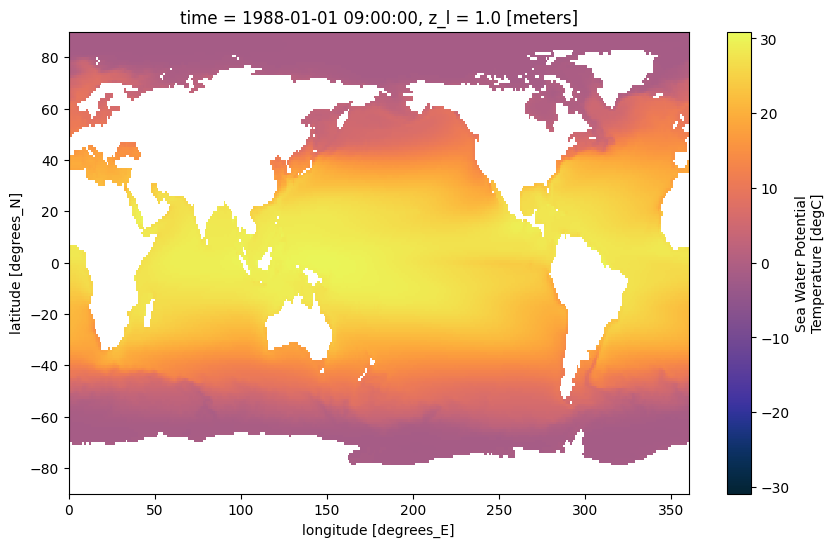

In [3]:
ds["thetao"].isel(time=0, z_l=0).plot(cmap=cmocean.cm.thermal, figsize=[10, 6])

Now, let us use a map projection using cartopy. We will also add our own colorbar to the plot.

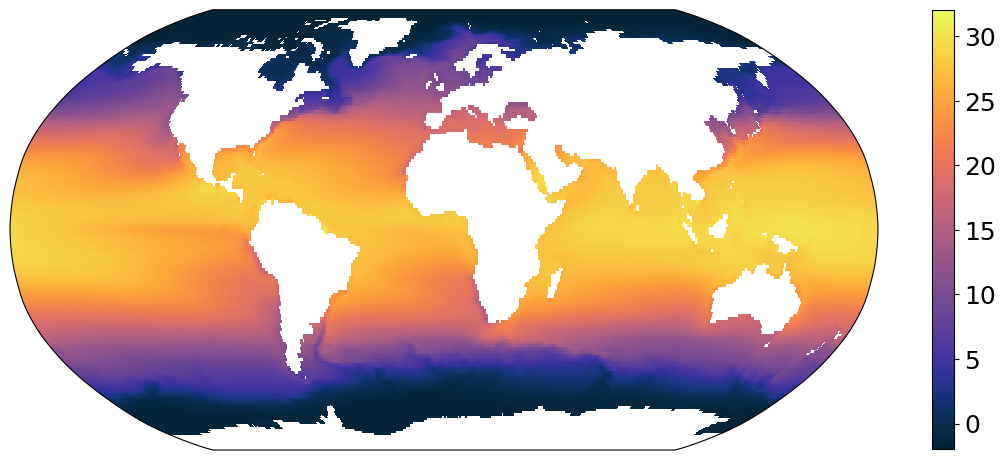

In [4]:
plt.figure(figsize=[14, 6])
subplot_kws = dict(projection=ccrs.Robinson(), facecolor="white")
p = (
    ds["thetao"]
    .isel(time=0, z_l=0)
    .plot(
        vmin=-2,
        vmax=32,
        cmap=cmocean.cm.thermal,
        subplot_kws=subplot_kws,
        transform=ccrs.PlateCarree(),
        add_labels=False,
        add_colorbar=False,
    )
)

# add separate colorbar
cb = plt.colorbar(p, ticks=[0, 5, 10, 15, 20, 25, 30], shrink=0.95)
cb.ax.tick_params(labelsize=18)

You can pick any projection from the cartopy list but, whichever projection you use, you still have to set transform to ccrs.PlateCarree(). Let us use a different projection and add coastlines and gridlines to the plot.

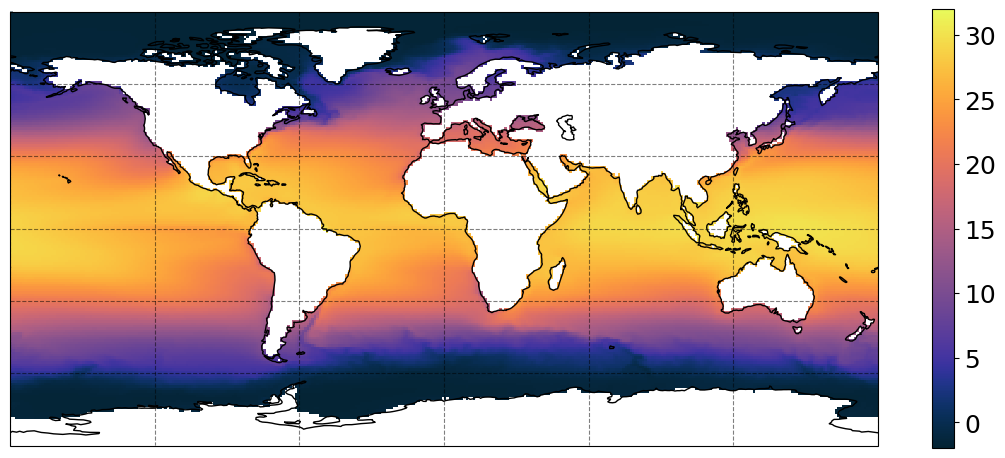

In [5]:
plt.figure(figsize=[14, 6])
subplot_kws = dict(projection=ccrs.PlateCarree(), facecolor="white")
p = (
    ds["thetao"]
    .isel(time=0, z_l=0)
    .plot(
        vmin=-2,
        vmax=32,
        cmap=cmocean.cm.thermal,
        subplot_kws=subplot_kws,
        transform=ccrs.PlateCarree(),
        add_labels=False,
        add_colorbar=False,
    )
)
p.axes.coastlines()
p.axes.gridlines(color="black", alpha=0.5, linestyle="--")

# add separate colorbar
cb = plt.colorbar(p, ticks=[0, 5, 10, 15, 20, 25, 30], shrink=0.95)
cb.ax.tick_params(labelsize=18)

Another projection!

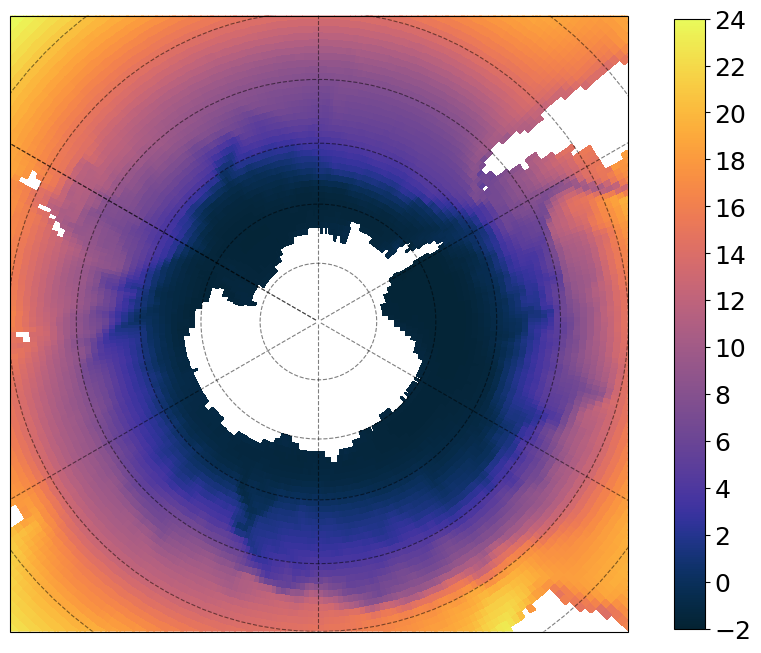

In [6]:
subplot_kws = dict(
    projection=ccrs.SouthPolarStereo(central_longitude=-120.0), facecolor="white"
)

plt.figure(figsize=[12, 8])
p = (
    ds["thetao"]
    .isel(time=0, z_l=0)
    .plot(
        vmin=-2,
        vmax=24,
        cmap=cmocean.cm.thermal,
        subplot_kws=subplot_kws,
        transform=ccrs.PlateCarree(),
        add_labels=False,
        add_colorbar=False,
    )
)

# add separate colorbar
cb = plt.colorbar(
    p, ticks=[-2, 0, 2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22, 24], shrink=0.99
)
cb.ax.tick_params(labelsize=18)

p.axes.gridlines(color="black", alpha=0.5, linestyle="--")
p.axes.set_extent([-300, 60, -40, -90], ccrs.PlateCarree())